In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Filmes de alto cache possuem notas altas? 

In [3]:
movies = pd.read_csv('archive/movies_metadata.csv')
movies = movies[['title','budget','genres','id', 'imdb_id', 'original_language','popularity', 'production_companies', 'production_countries', 'revenue', 'vote_average','vote_count']]
#Ordene os filmes por cache (budget) e mostre os 10 primeiros
movies = movies.loc[movies['budget'] != 0]
movies = movies.loc[movies['revenue'] != 0]
movies['budget'] = pd.to_numeric(movies['budget'],'coerce').fillna(0).astype(float)
movies['revenue'] = pd.to_numeric(movies['revenue'],'coerce').fillna(0).astype(float)
movies.rename(columns={'id': 'movieId'}, inplace=True)
movies.set_index('movieId', inplace=True)
movies.dropna(inplace=True)
movies = movies.sort_values(by=['revenue'], ascending=False)
movies.head(10)

/Users/joaomarcostomaz/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py:3269: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,title,budget,genres,imdb_id,original_language,popularity,production_companies,production_countries,revenue,vote_average,vote_count
movieId,,,,,,,,,,,
19995,Avatar,237000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0499549,en,185.070892,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2.787965e+09,7.2,12114.0
140607,Star Wars: The Force Awakens,245000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt2488496,en,31.626013,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Tru...","[{'iso_3166_1': 'US', 'name': 'United States o...",2.068224e+09,7.5,7993.0
597,Titanic,200000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",tt0120338,en,26.88907,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1.845034e+09,7.5,7770.0
24428,The Avengers,220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",tt0848228,en,89.887648,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1.519558e+09,7.4,12000.0
135397,Jurassic World,150000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0369610,en,32.790475,"[{'name': 'Universal Studios', 'id': 13}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1.513529e+09,6.5,8842.0
168259,Furious 7,190000000.0,"[{'id': 28, 'name': 'Action'}]",tt2820852,en,27.275687,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",1.506249e+09,7.3,4253.0
99861,Avengers: Age of Ultron,280000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt2395427,en,37.37942,"[{'name': 'Marvel Studios', 'id': 420}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",1.405404e+09,7.3,6908.0
12445,Harry Potter and the Deathly Hallows: Part 2,125000000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",tt1201607,en,24.990737,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1.342000e+09,7.9,6141.0
109445,Frozen,150000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",tt2294629,en,24.248243,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1.274219e+09,7.3,5440.0


In [26]:
mean_budget = movies['budget'].mean()
print('Média de orçamento: ', mean_budget)

Média de orçamento:  22586541.188174944


In [9]:
def t_obs(data):
    bom = data[data['vote_average'].values >= 6.0]['revenue'].values
    ruim = data[data['vote_average'].values < 6.0]['revenue'].values
    estatistica = np.mean(bom) - np.mean(ruim)
    return estatistica

tobs = t_obs(movies)
print(tobs)

35756269.204428874


In [17]:
def shuffling(data):
    permutadas = np.zeros(5000)
    n = 5000
    col = "vote_average"
    for i in range(n):
        data_copy = data.copy()
        data_copy["Permutation"] = np.random.permutation(data_copy[col].values)
        new = data_copy[["revenue", "Permutation"]]
        means = new.groupby(by="Permutation").mean().reset_index()
        mean_first = means[means["Permutation"] >= 6.0]["revenue"].mean()
        mean_sec = means[means["Permutation"] < 6.0]["revenue"].mean()
        diff = mean_first - mean_sec
        permutadas[i] = diff

    mean_permutadas = np.mean(permutadas)
    std_permutadas = np.std(permutadas)
    LI = np.percentile(permutadas, 2.5)
    LS = np.percentile(permutadas, 97.5)
    return (LI, LS, mean_permutadas, std_permutadas, permutadas)

LI, LS, mean_permutadas, std_permutadas, permutadas = shuffling(movies)
print(LI, LS)
print(mean_permutadas, std_permutadas)

-31590687.704759844 33083126.521538462
176921.54582177196 16108670.506313458


In [11]:
def resposta():
    stats = tobs
    def shuff(movies):
        N = 1000
        diffs = np.zeros(N)
        vote = movies["vote_average"].values
        revenue = movies["revenue"].values
        for i in range(N):
            permutations = np.random.permutation(vote)
            grup1 = revenue[permutations >= 6.0]
            grup2 = revenue[permutations < 6.0]
            diff = np.mean(grup1) - np.mean(grup2)
            diffs[i] = diff

            p_value = np.sum(diffs >= stats) / len(diffs)

        return p_value < 0.05
    
    p_value = shuff(movies)
    return p_value

print(resposta())


True


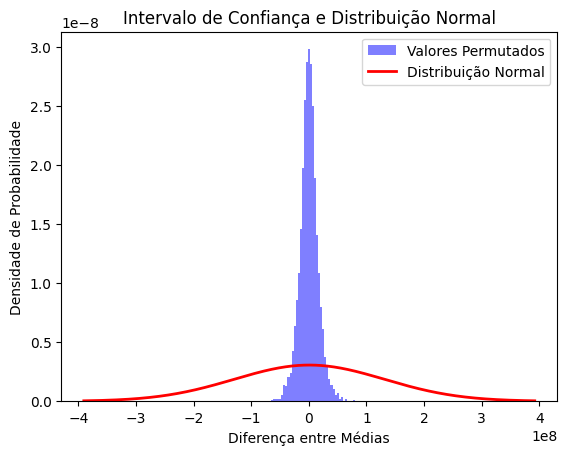

In [20]:
mean = (LI + LS) / 2
std = (LS-LI)/(2*norm.pdf(0.975))

x = np.linspace(mean - 3*std, mean + 3*std, 1000)
y = norm.pdf(x, mean, std)


# Crie um histograma dos valores permutados com mais bins e cores personalizadas
plt.hist(permutadas, bins=50, density=True, alpha=0.5, color='blue', label='Valores Permutados')

# Plote a distribuição normal em vermelho
plt.plot(x, y, 'r', lw=2, label='Distribuição Normal')

# Defina rótulos e título
plt.xlabel('Diferença entre Médias')
plt.ylabel('Densidade de Probabilidade')
plt.title('Intervalo de Confiança e Distribuição Normal')

# Adicione uma legenda
plt.legend()

# Mostre o gráfico
plt.show()


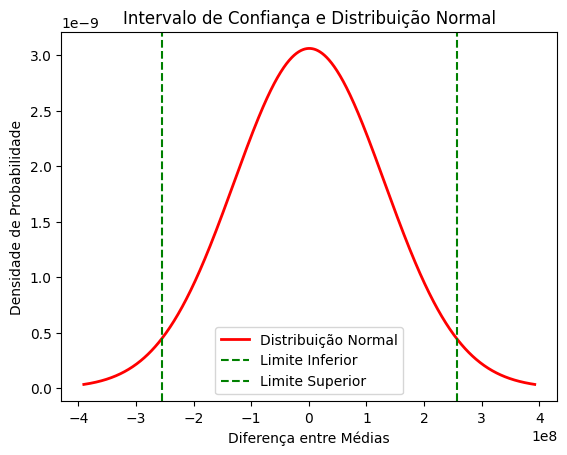

In [25]:
from scipy.stats import norm
ci = norm.interval(0.95, loc=mean, scale=std)
plt.plot(x, y, 'r', lw=2, label='Distribuição Normal')
plt.axvline(x=ci[0], color='green', label='Limite Inferior', linestyle='--')
plt.axvline(x=ci[1], color='green', label='Limite Superior', linestyle='--')
plt.xlabel('Diferença entre Médias')
plt.ylabel('Densidade de Probabilidade')
plt.title('Intervalo de Confiança e Distribuição Normal')
plt.legend()
plt.show()

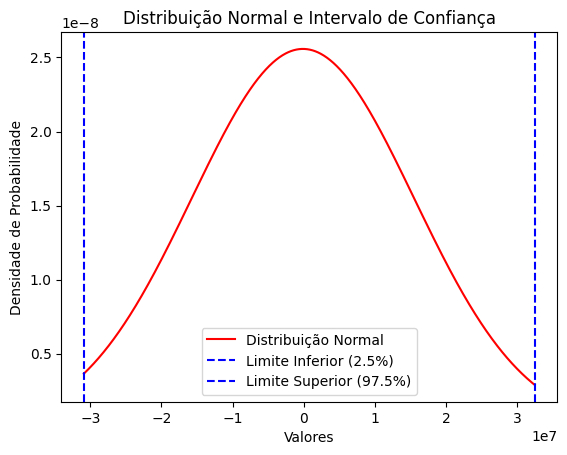

In [14]:
from scipy.stats import norm
x = np.linspace(LI, LS, 1000)
y = norm.pdf(x, loc=mean_permutadas, scale=std_permutadas)

plt.plot(x, y, label='Distribuição Normal', color='red')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Normal e Intervalo de Confiança')
plt.axvline(LI, color='blue', linestyle='--', label='Limite Inferior (2.5%)')
plt.axvline(LS, color='blue', linestyle='--', label='Limite Superior (97.5%)')
plt.legend()
plt.show()

In [5]:
corr = movies['vote_average'].corr(movies['revenue'])
print(corr)

0.14940213706811484


## Resposta
Podemos ver que existe uma correlação positiva entre avaliação e cache, ou seja, os de maiores avaliações possuem sim maiores caches

## Os filmes de maiores gastos possuem maiores avaliações?

In [38]:
def t_obs2(data):
    alto = data[data['budget'].values >=  22586541.0]['vote_average'].values
    baixo = data[data['budget'].values < 22586541.0]['vote_average'].values
    estatistica = np.mean(alto) - np.mean(baixo)
    return estatistica

tobs2 = t_obs2(movies)
print(tobs2)

-0.019615557553957608


In [34]:
def shuffling2(data):
    N = 5000
    permutadas = np.zeros(N)
    col = "budget"
    for i in range(N):
        data_copy = data.copy()
        data_copy["Permutation"] = np.random.permutation(data_copy[col].values)
        new = data_copy[["vote_average", "Permutation"]]
        means = new.groupby(by="Permutation").mean().reset_index()
        mean_first = means[means["Permutation"] >= 22586541.0]["vote_average"].mean()
        mean_sec = means[means["Permutation"] < 22586541.0]["vote_average"].mean()
        diff = mean_first - mean_sec
        permutadas[i] = diff
    
    mean_permutadas = np.mean(permutadas)
    std_permutadas = np.std(permutadas)
    LI = np.percentile(permutadas, 2.5)
    LS = np.percentile(permutadas, 97.5)
    return (LI, LS, mean_permutadas, std_permutadas, permutadas)

LI2, LS2, mean_permutadas2, std_permutadas2, permutadas2 = shuffling2(movies)
print(LI2, LS2)

-0.13520445864020764 0.12968460217964145


In [35]:
def resposta2():
    stats = tobs2
    def shuff(movies):
        N = 1000
        diffs = np.zeros(N)
        vote = movies["vote_average"].values
        budget = movies["budget"].values
        for i in range(N):
            permutations = np.random.permutation(budget)
            grup1 = vote[permutations >= 22586541.0]
            grup2 = vote[permutations < 22586541.0]
            diff = np.mean(grup1) - np.mean(grup2)
            diffs[i] = diff

            p_value = np.sum(diffs >= stats) / len(diffs)

        return p_value < 0.05
    
    p_value = shuff(movies)
    return p_value

print(resposta2())


False


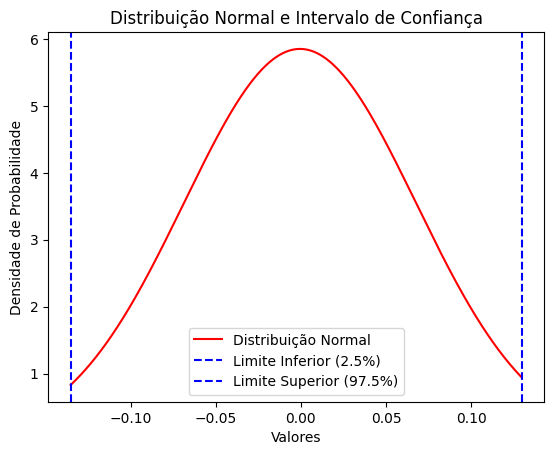

In [39]:
x = np.linspace(LI2, LS2, 1000)
y = norm.pdf(x, loc=mean_permutadas2, scale=std_permutadas2)

plt.plot(x, y, label='Distribuição Normal', color='red')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Normal e Intervalo de Confiança')
plt.axvline(LI2, color='blue', linestyle='--', label='Limite Inferior (2.5%)')
plt.axvline(LS2, color='blue', linestyle='--', label='Limite Superior (97.5%)')
plt.legend()
plt.show()


In [36]:
corr2 = movies['budget'].corr(movies['vote_average'])
print(corr2)

0.028887630434011637
